# Kalibration von Klassifikatoren

## Beispiel-Datensatz erstellen

In [45]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
)

train_samples = 50
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    shuffle=False,
    test_size=100_000 - train_samples,
)

In [46]:
x_train.shape

(50, 20)

In [47]:
y_train.shape

(50,)

In [48]:
y_train[:10]

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

## Zwei Modelle trainieren

**Aufgabe:** Trainiere einen `RandomForestClassifier` und eine `LogisticRegression`.

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [50]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
rf.predict(x_test[:5])

array([1, 0, 1, 1, 0])

In [52]:
rf.predict_proba(x_test[:5])

array([[0.43, 0.57],
       [0.54, 0.46],
       [0.37, 0.63],
       [0.26, 0.74],
       [0.91, 0.09]])

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [54]:
lr.fit(x_train, y_train)

LogisticRegression()

In [55]:
lr.predict(x_test[:5])

array([1, 1, 1, 1, 0])

In [56]:
lr.predict_proba(x_test[:5])

array([[0.18432515, 0.81567485],
       [0.41907241, 0.58092759],
       [0.04047439, 0.95952561],
       [0.3276773 , 0.6723227 ],
       [0.99719949, 0.00280051]])

## Kalibration untersuchen

In [57]:
from sklearn.calibration import CalibrationDisplay

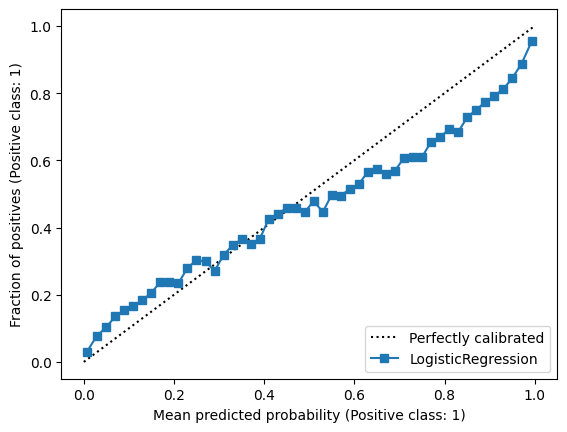

In [58]:
CalibrationDisplay.from_estimator(lr, x_test, y_test, n_bins=50)

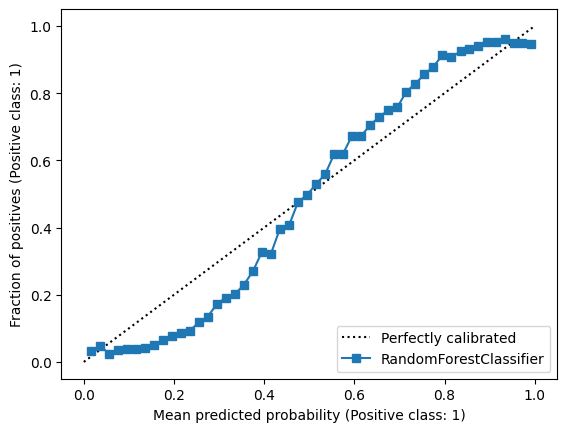

In [59]:
CalibrationDisplay.from_estimator(rf, x_test, y_test, n_bins=50)

## Klassifikatoren kalibrieren

In [60]:
from sklearn.calibration import CalibratedClassifierCV

In [61]:
calibrated_lr = CalibratedClassifierCV(estimator=lr, cv="prefit")

In [62]:
x_calib, x_test_calib, y_calib, y_test_calib = train_test_split(x_test, y_test, train_size=10_000)

In [63]:
x_calib.shape

(10000, 20)

In [64]:
calibrated_lr.fit(x_calib, y_calib)

CalibratedClassifierCV(cv='prefit', estimator=LogisticRegression())

In [65]:
import matplotlib.pyplot as plt

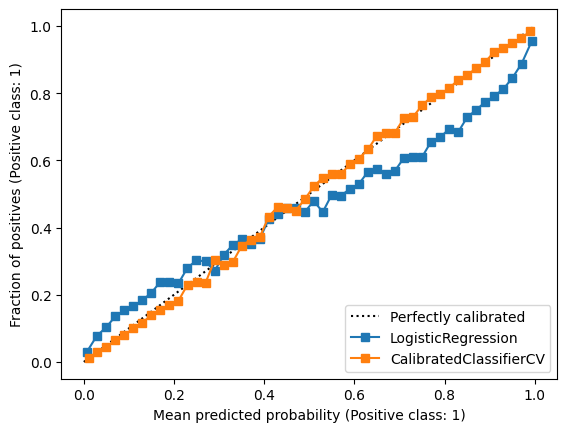

In [66]:
fig, ax = plt.subplots()
CalibrationDisplay.from_estimator(lr, x_test, y_test, n_bins=50, ax=ax)
CalibrationDisplay.from_estimator(calibrated_lr, x_test_calib, y_test_calib, n_bins=50, ax=ax)